In [246]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [247]:
# Chargement des datasets de validation
batch_size = 32
img_height = 128
img_width = 128
validation_dir = './DataTest'

In [248]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Important pour que les prédictions correspondent aux étiquettes
)

Found 106 files belonging to 6 classes.


In [249]:
# Extraction des étiquettes de validation
class_names = validation_ds.class_names
y_true = np.concatenate([y for x, y in validation_ds], axis=0)

In [250]:
# Prédictions du modèle
model = tf.keras.models.load_model('./model_IA_NewImages.h5', compile=False)

optimizer = Adam()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

prediction = model.predict(validation_ds)
y_pred = np.argmax(prediction, axis=1)
print(prediction)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)       

In [251]:
# Calcul de la matrice de confusion
matriceDeConfusion = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriceDeConfusion, display_labels=class_names)

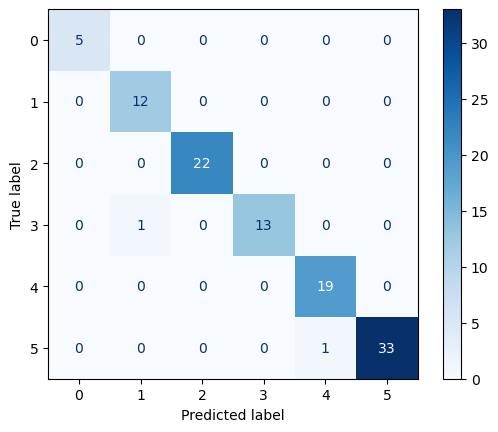

In [252]:
# Affichage de la matrice de confusion
disp.plot(cmap=plt.cm.Blues)
plt.show()